In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./LUCAS-SOIL-2018.csv")
df.head()

,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3,< LOD,1.1,101.9,...,AT113,47.150238,16.134212,06-07-18,291,C23,U120,Woodland,Other coniferous woodland,Forestry
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1,< LOD,1.3,51.2,...,AT113,47.274272,16.175359,06-07-18,373,C21,U120,Woodland,Spruce dominated coniferous woodland,Forestry
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1,12.3,3.1,114.8,...,AT113,47.123260,16.289693,02-06-18,246,C33,U120,Woodland,Other mixed woodland,Forestry
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3,< LOD,2,165.8,...,AT113,47.245693,16.357506,06-07-18,305,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2,< LOD,2.2,42.1,...,AT113,47.296372,16.416782,05-07-18,335,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry


In [5]:
df.columns

Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N',
       'K', 'OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_0',
       'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'SURVEY_DATE',
       'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18984 entries, 0 to 18983
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Depth             18984 non-null  object 
 1   POINTID           18984 non-null  int64  
 2   pH_CaCl2          18983 non-null  float64
 3   pH_H2O            18983 non-null  float64
 4   EC                18975 non-null  float64
 5   OC                18983 non-null  object 
 6   CaCO3             11221 non-null  object 
 7   P                 18958 non-null  object 
 8   N                 18983 non-null  object 
 9   K                 18983 non-null  object 
 10  OC (20-30 cm)     141 non-null    object 
 11  CaCO3 (20-30 cm)  14 non-null     float64
 12  Ox_Al             2510 non-null   float64
 13  Ox_Fe             2510 non-null   float64
 14  NUTS_0            18984 non-null  object 
 15  NUTS_1            18984 non-null  object 
 16  NUTS_2            18984 non-null  object

In [7]:
df.describe()

,POINTID,pH_CaCl2,pH_H2O,EC,CaCO3 (20-30 cm),Ox_Al,Ox_Fe,TH_LAT,TH_LONG,Elev
count,1.898400e+04,18983.000000,18983.000000,18975.000000,14.000000,2510.000000,2510.000000,18984.000000,18984.000000,18984.000000
mean,4.277080e+07,5.706427,6.259460,18.389964,288.857143,1.171474,2.547171,48.689184,10.330166,613.188211
std,8.350827e+06,1.398586,1.319465,25.560630,236.021139,1.243111,2.431786,7.779195,11.192492,1461.681637
min,2.652197e+07,2.600000,3.340000,0.240000,1.000000,0.000000,0.100000,34.690270,-10.149099,-55.000000
25%,3.492293e+07,4.500000,5.120000,8.095000,64.500000,0.600000,1.000000,42.229369,-0.745365,124.000000
50%,4.466391e+07,5.800000,6.290000,13.950000,287.500000,0.900000,1.900000,47.338688,12.078146,261.000000
75%,4.992278e+07,7.100000,7.500000,20.600000,417.750000,1.300000,3.300000,53.424240,20.647825,666.250000
max,6.498167e+07,9.800000,10.430000,1295.600000,702.000000,34.700000,35.800000,69.956515,34.029660,11464.000000


In [8]:
def grab_col_names(data, cat_th=10, car_th=20):
    # Categorical columns and categorical but high-cardinality columns
    cat_cols = [col for col in data.columns if data[col].dtypes == "O"]
    num_but_cat = [
        col
        for col in data.columns
        if data[col].nunique() < cat_th and data[col].dtypes != "O"
    ]
    high_card_cat_cols = [
        col
        for col in data.columns
        if data[col].nunique() > car_th and data[col].dtypes == "O"
    ]

    # Combine Object type columns and Low-unique-value numeric columns into cat_cols
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in high_card_cat_cols]

    # Numerical columns excluding those considered as categorical
    num_cols = [col for col in data.columns if data[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Display information about the dataset
    print(f"Observations: {data.shape[0]}")
    print(f"Variables: {data.shape[1]}")
    print(f"Categorical Columns: {len(cat_cols)}")
    print(f"Numerical Columns: {len(num_cols)}")
    print(f"High Cardinality Categorical Columns: {len(high_card_cat_cols)}")
    print(f"Number but Categorical Columns: {len(num_but_cat)}")
    print("\n")

    return cat_cols, num_cols, high_card_cat_cols


cat_cols, num_cols, high_card_cat_cols = grab_col_names(df)
print(f"Catergorical Columns: {cat_cols}")
print(f"Numerical Columns: {num_cols}")
print(f"High Cardinality Categorical Columns: {high_card_cat_cols}")

Observations: 18984
Variables: 27
Categorical Columns: 2
Numerical Columns: 10
High Cardinality Categorical Columns: 15
Number but Categorical Columns: 0


Catergorical Columns: ['Depth', 'LC0_Desc']
Numerical Columns: ['POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'TH_LAT', 'TH_LONG', 'Elev']
High Cardinality Categorical Columns: ['OC', 'CaCO3', 'P', 'N', 'K', 'OC (20-30 cm)', 'NUTS_0', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'SURVEY_DATE', 'LC', 'LU', 'LC1_Desc', 'LU1_Desc']


In [9]:
print(f"Total number of missing values: {df.isnull().sum().sum()}")

Total number of missing values: 78564


In [10]:
print(f"Number of Duplicate Rows: {df.duplicated().sum()}")

Number of Duplicate Rows: 0


In [11]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["float64"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

Categorical Columns: ['Depth', 'OC', 'CaCO3', 'P', 'N', 'K', 'OC (20-30 cm)', 'NUTS_0', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'SURVEY_DATE', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc']
Numerical Columns: ['pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'TH_LAT', 'TH_LONG']


In [12]:
print(df.isnull().sum())  # Count missing values per column

Depth                   0
POINTID                 0
pH_CaCl2                1
pH_H2O                  1
EC                      9
OC                      1
CaCO3                7763
P                      26
N                       1
K                       1
OC (20-30 cm)       18843
CaCO3 (20-30 cm)    18970
Ox_Al               16474
Ox_Fe               16474
NUTS_0                  0
NUTS_1                  0
NUTS_2                  0
NUTS_3                  0
TH_LAT                  0
TH_LONG                 0
SURVEY_DATE             0
Elev                    0
LC                      0
LU                      0
LC0_Desc                0
LC1_Desc                0
LU1_Desc                0
dtype: int64


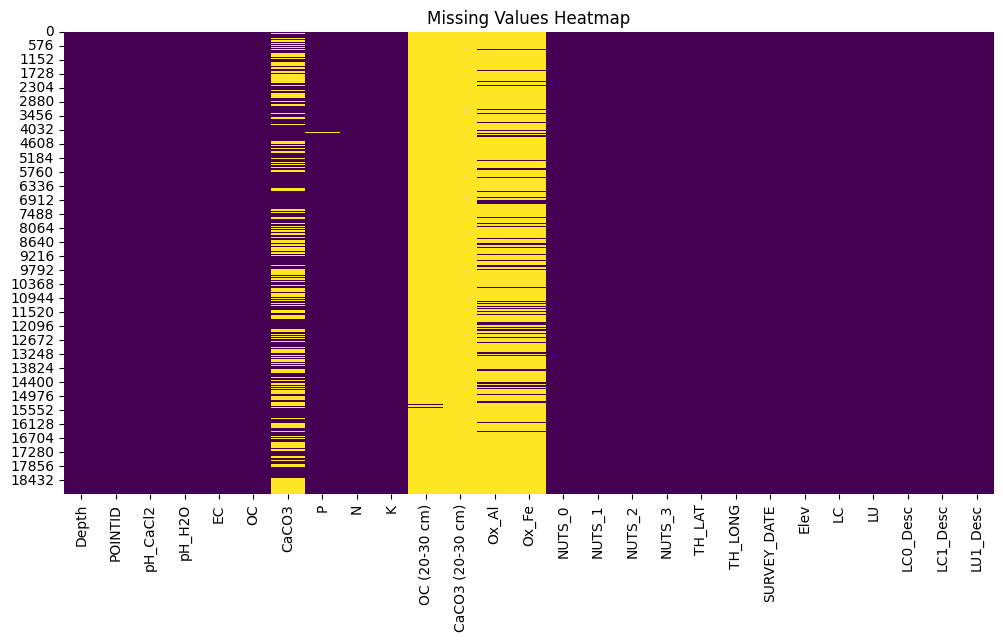

In [13]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [14]:
# Missing values percentage
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=False)
print("Missing Values Percentage:")
print(missing_percentage)

Missing Values Percentage:
CaCO3 (20-30 cm)    99.926254
OC (20-30 cm)       99.257269
Ox_Al               86.778340
Ox_Fe               86.778340
CaCO3               40.892330
P                    0.136957
EC                   0.047408
pH_CaCl2             0.005268
pH_H2O               0.005268
OC                   0.005268
N                    0.005268
K                    0.005268
dtype: float64


In [15]:
# drop missing columns over 80%
missing_threshold = 0.8
missing_cols = missing_percentage[missing_percentage > missing_threshold].index
df.drop(columns=missing_cols, inplace=True)
print(f"Columns dropped due to missing values: {missing_cols.tolist()}")

Columns dropped due to missing values: ['CaCO3 (20-30 cm)', 'OC (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'CaCO3']


In [16]:
print(f"Remaining columns: {df.columns.tolist()}")
print(df.isnull().sum())  # Count missing values per column


# Fillup missing values
def fill_missing_values(data):
    # Fill missing values for numerical columns with the mean
    for col in data.select_dtypes(include=["float64"]).columns:
        data[col].fillna(data[col].mean(), inplace=True)

    # Fill missing values for categorical columns with the mode
    for col in data.select_dtypes(include=["object"]).columns:
        data[col].fillna(data[col].mode()[0], inplace=True)

    return data


df = fill_missing_values(df)

Remaining columns: ['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'P', 'N', 'K', 'NUTS_0', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'SURVEY_DATE', 'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc']
Depth           0
POINTID         0
pH_CaCl2        1
pH_H2O          1
EC              9
OC              1
P              26
N               1
K               1
NUTS_0          0
NUTS_1          0
NUTS_2          0
NUTS_3          0
TH_LAT          0
TH_LONG         0
SURVEY_DATE     0
Elev            0
LC              0
LU              0
LC0_Desc        0
LC1_Desc        0
LU1_Desc        0
dtype: int64


/var/folders/d5/tjnvwpgj1yddg5dlp5dr9wqr0000gn/T/ipykernel_79295/3989298623.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/var/folders/d5/tjnvwpgj1yddg5dlp5dr9wqr0000gn/T/ipykernel_79295/3989298623.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [17]:
print(df.isnull().sum())  # Count missing values per column

Depth          0
POINTID        0
pH_CaCl2       0
pH_H2O         0
EC             0
OC             0
P              0
N              0
K              0
NUTS_0         0
NUTS_1         0
NUTS_2         0
NUTS_3         0
TH_LAT         0
TH_LONG        0
SURVEY_DATE    0
Elev           0
LC             0
LU             0
LC0_Desc       0
LC1_Desc       0
LU1_Desc       0
dtype: int64


In [18]:
# Label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder


def label_encode(data):
    le = LabelEncoder()
    for col in data.select_dtypes(include=["object"]).columns:
        data[col] = le.fit_transform(data[col])
    return data


df = label_encode(df)
print(df.head())

   Depth   POINTID  pH_CaCl2  pH_H2O     EC    OC     P    N     K  NUTS_0  \
0      1  47862690       4.1    4.81   8.73   186  1267   12    26       0   
1      1  47882704       4.1    4.93   5.06   455  1267   15  3954       0   
2      1  47982688       4.1    4.85  12.53  1533   164  221   220       0   
3      1  48022702       5.5    5.80  21.10   932  1267  127   836       0   
4      1  48062708       6.1    6.48  10.89   605  1267  131  3362       0   

   ...  NUTS_3     TH_LAT    TH_LONG  SURVEY_DATE  Elev  LC  LU  LC0_Desc  \
0  ...       2  47.150238  16.134212           44   291  47   3         7   
1  ...       2  47.274272  16.175359           44   373  45   3         7   
2  ...       2  47.123260  16.289693            9   246  50   3         7   
3  ...       2  47.245693  16.357506           44   305  46   3         7   
4  ...       2  47.296372  16.416782           36   335  46   3         7   

   LC1_Desc  LU1_Desc  
0        32        12  
1        55        1

In [19]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler


# def scale_numerical_features(data):
#     scaler = StandardScaler()
#     for col in data.select_dtypes(include=["float64"]).columns:
#         data[col] = scaler.fit_transform(data[[col]])
#     return data


# df = scale_numerical_features(df)
# print(df.head())

In [20]:
df.columns

Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'P', 'N', 'K',
       'NUTS_0', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG',
       'SURVEY_DATE', 'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = df.drop(columns=["pH_H2O", "pH_CaCl2"])
y = df["pH_H2O"]
print("Features shape:", X.shape)
print("Target shape:", y.shape)
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Features shape: (18984, 20)
Target shape: (18984,)
X_train shape: (15187, 20)
X_test shape: (3797, 20)
y_train shape: (15187,)
y_test shape: (3797,)


In [22]:
# Model training
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
}
# Initialize a dictionary to store the results
results = {}
# Iterate through the models
for model_name, model in models.items():
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(
        [
            (
                "preprocessor",
                ColumnTransformer(
                    transformers=[
                        (
                            "num",
                            StandardScaler(),
                            X.select_dtypes(include=["float64"]).columns,
                        ),
                        (
                            "cat",
                            "passthrough",
                            X.select_dtypes(include=["int64"]).columns,
                        ),
                    ]
                ),
            ),
            ("model", model),
        ]
    )

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {"MSE": mse, "R2": r2}

Model Performance:
Linear Regression: MSE = 0.7593, R2 = 0.5732
Random Forest: MSE = 0.3756, R2 = 0.7889
Support Vector Regression: MSE = 1.5817, R2 = 0.1110
Decision Tree: MSE = 0.7380, R2 = 0.5852
K-Nearest Neighbors: MSE = 1.4391, R2 = 0.1911


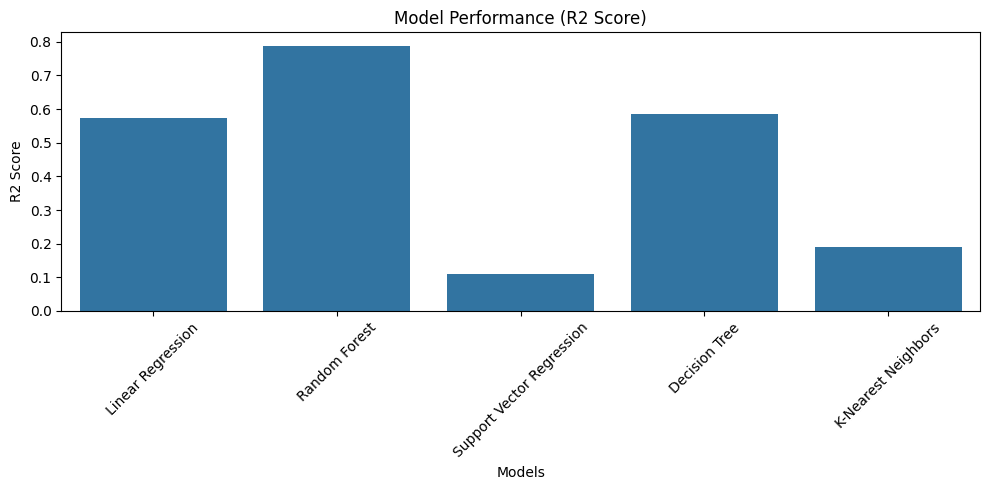

In [23]:
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")
# Visualize the results
plt.figure(figsize=(10, 5))
sns.barplot(
    x=list(results.keys()),
    y=[metrics["R2"] for metrics in results.values()],
)
plt.title("Model Performance (R2 Score)")
plt.ylabel("R2 Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()